In [4]:
import requests
import lxml.html as lh
import pandas as pd

In [172]:
#importing csv and getting health expenditure as a % of OECD country's GDP
import csv
import os

headers = []
oecd_data = []

os.getcwd()

# only include health expenditure as a % of GDP of each country in 2018
def include_line(row):
     return 'Share of gross domestic product' in row and '2018' in row and 'All financing schemes' in row and 'Current expenditure on health (all functions)' in row
    

with open('OECD_data.csv') as file:
    f = csv.reader(file)
    headers = next(f)
    
    for row in f:
        if include_line(row):
            oecd_data.append(row)

# creating a dictionary
oecd_dict = {}
for header in headers:
    if header == 'Country' or header == 'Value':
        oecd_dict[header] = []

#adding data to each corresponding header
for elem in oecd_data:
    for header, data in oecd_dict.items():
        if header == 'Country':
            oecd_dict[header].append(elem[9])
        if header == 'Value':
            oecd_dict[header].append(elem[18])

oecd_df = pd.DataFrame(oecd_dict)
oecd_df

,Country,Value
0,Denmark,10.47
1,France,11.177
2,Greece,7.846
3,Italy,8.813
4,Norway,10.182
5,Portugal,9.099
6,Sweden,11.037
7,Turkey,4.172
8,United Kingdom,9.768
9,Australia,9.252


In [181]:
#parse data into float types
comma_removed_expenditure = []
for i in range(len(oecd_dict['Value'])):
    a = float(oecd_dict['Value'][i])
    oecd_dict['Value'][i] = a


In [183]:
country_tuple = []
for i in range(len(oecd_dict['Country'])):
    country_tuple.append((oecd_dict['Country'][i], oecd_dict['Value'][i]))

    


In [184]:
#Getting covid 19 cases in oecd countries from url and a 
covid_url = 'http://www.worldometers.info/coronavirus/?utm_campaign=homeAdvegas1?'
page = requests.get(covid_url)

In [185]:
#creating a correct html doc from the given string
doc = lh.fromstring(page.content)
xpath_rows = '//tr'
rows = doc.xpath(xpath_rows)



In [186]:
#Check the length of the first 12 rows
[len(T) for T in rows[:12]]

[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]

In [187]:
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
# Only get the following columns: country and total cases
for t in rows[0]:
    i+=1
    if i == 4:
        break
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))
    

1:"#"
2:"Country,Other"
3:"TotalCases"


In [188]:
import re
        
def meet_crit(data):
    # These are the countries that are named differently in the two datasets
    # For example in OECD = United States whereas in Worldometer = USA so we can't check if USA is in OECD dictionary
    countries = ['USA','UK', 'S. Korea', 'Slovakia', 'Czechia']
    return data in oecd_dict['Country'] or data in countries

# getting data from rows:
for j in range(1, len(rows)):
    row = rows[j];
    i = 0
    temp = []
    for t in row.iterchildren():
        data=t.text_content()
        if i == 3:
            break
        if i == 0: #or i == 2:
            try: 
        #Convert any numerical value to integers
                data=data.replace(',','')
                data = int(float(data))
#                 print(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        temp.append(data)
        #Increment i for the next column
        i+=1
    #only include covid data for OECD member countries and do not include duplicate
    if meet_crit(temp[1]):
        if temp[1] in col[1][1]:
            continue
        else:
            for i in range(3):
                print(temp[i])
                col[i][1].append(temp[i])


1
USA
2,979,769
6
Spain
297,625
7
Chile
295,532
8
UK
285,416
9
Mexico
252,165
10
Italy
241,611
14
Turkey
205,758
15
Germany
197,558
17
France
166,960
20
Canada
105,535
24
Sweden
71,419
27
Belgium
61,838
31
Netherlands
50,335
38
Portugal
43,897
42
Poland
35,950
44
Switzerland
32,268
45
Israel
29,958
50
Ireland
25,527
55
Japan
19,522
56
Austria
18,280
62
S. Korea
13,091
63
Denmark
12,832
65
Czechia
12,515
69
Norway
8,930
71
Australia
8,449
77
Finland
7,253
91
Luxembourg
4,522
93
Hungary
4,183
95
Greece
3,519
110
Estonia
1,993
112
Iceland
1,860
113
Lithuania
1,836
115
Slovakia
1,764
116
Slovenia
1,700
121
New Zealand
1,533
128
Latvia
1,124


In [189]:
#making sure covid data list and health expenditure list have the same number of countries
len(col[1][1]) == len(oecd_dict['Country'])

col[2][1]

['2,979,769',
 '297,625',
 '295,532',
 '285,416',
 '252,165',
 '241,611',
 '205,758',
 '197,558',
 '166,960',
 '105,535',
 '71,419',
 '61,838',
 '50,335',
 '43,897',
 '35,950',
 '32,268',
 '29,958',
 '25,527',
 '19,522',
 '18,280',
 '13,091',
 '12,832',
 '12,515',
 '8,930',
 '8,449',
 '7,253',
 '4,522',
 '4,183',
 '3,519',
 '1,993',
 '1,860',
 '1,836',
 '1,764',
 '1,700',
 '1,533',
 '1,124']

In [190]:
df.to_json('Covid.json')
#backup data

In [191]:
comma_removed = []
for i in col[2][1]:
    a = i.replace(',','')
    a = int(float(a))
    comma_removed.append(a)

new_covid_tuple = ('Total Cases', comma_removed)
col[2] = new_covid_tuple

In [192]:
col[2][1]

[2979769,
 297625,
 295532,
 285416,
 252165,
 241611,
 205758,
 197558,
 166960,
 105535,
 71419,
 61838,
 50335,
 43897,
 35950,
 32268,
 29958,
 25527,
 19522,
 18280,
 13091,
 12832,
 12515,
 8930,
 8449,
 7253,
 4522,
 4183,
 3519,
 1993,
 1860,
 1836,
 1764,
 1700,
 1533,
 1124]

In [198]:
dictionary = {header:data for (header, data) in col}
df = pd.DataFrame(dictionary)
df.columns = ['#', 'Country', 'Total Cases'];
df

,#,Country,Total Cases
0,1,USA,2979769
1,6,Spain,297625
2,7,Chile,295532
3,8,UK,285416
4,9,Mexico,252165
5,10,Italy,241611
6,14,Turkey,205758
7,15,Germany,197558
8,17,France,166960
9,20,Canada,105535


In [194]:
#TODO:
# Combine the two data frames
# Plot linear regression

In [199]:
#To add health expenditures to covid data frame 
#initialize a dictionary to keep track of where countries in terms of index

# change between the official names in the OECD of of certain countries into the names used by worldometer
def parse_country(n):
    list_ = ['United States','United Kingdom', 'Korea', 'Slovak Republic', 'Czech Republic']
    countries = ['USA','UK', 'S. Korea', 'Slovakia', 'Czechia']
    index = 0
    result = n
    if n in countries:
        for i in range(len(countries)):
            if n == countries[i]:
                result = list_[i]
    return result


#health expenditure to add to covid data frame
expend = []
for i in range(len(col[1][1])):
    for j in range(len(country_tuple)):
        temp = parse_country(col[1][1][i])
        if temp == country_tuple[j][0]:
            expend.append(country_tuple[j][1])

expend

[16.937,
 8.86,
 8.911,
 9.768,
 5.457,
 8.813,
 4.172,
 11.229,
 11.177,
 10.734,
 11.037,
 10.372,
 9.941,
 9.099,
 6.288,
 12.183,
 7.463,
 7.095,
 10.918,
 10.33,
 8.102,
 10.47,
 7.515,
 10.182,
 9.252,
 9.075,
 5.408,
 6.593,
 7.846,
 6.449,
 8.34,
 6.805,
 6.729,
 7.946,
 9.341,
 5.866]

In [200]:
df['Health Expenditure'] = expend
df

,#,Country,Total Cases,Health Expenditure
0,1,USA,2979769,16.937
1,6,Spain,297625,8.860
2,7,Chile,295532,8.911
3,8,UK,285416,9.768
4,9,Mexico,252165,5.457
5,10,Italy,241611,8.813
6,14,Turkey,205758,4.172
7,15,Germany,197558,11.229
8,17,France,166960,11.177
9,20,Canada,105535,10.734


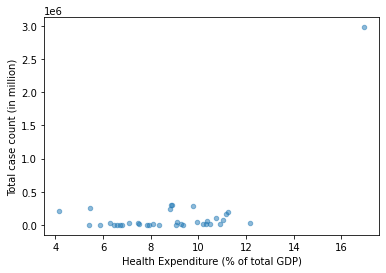

In [217]:
import matplotlib.pyplot as plt
import mplcursors
plot = df.plot(x ='Health Expenditure', y='Total Cases', kind = 'scatter', alpha=0.5)
plot.tick_params(axis='x', which='major', labelsize=10)
plt.xlabel('Health Expenditure (% of total GDP)')
plt.ylabel('Total case count (in million)')
plt.show()

In [221]:
#From initial look, it can be seen that there is no clear relationship between health expenditure as percentage of a 
#country's total GDP and the total COVID-19 cases in the country. However, in order to test this, I will conduct a correlation test

# H_0 = Health Expenditure and total case count are not correlated (ρ = 0)
# H_1 = Health Expenditure and total case count are correlated (ρ != 0)
from scipy.stats import pearsonr


corr, p_value = pearsonr(df['Health Expenditure'], df['Total Cases'])
corr, p_value
#Since p < 0.05, we can reject the null hypothesis. There is a slight positive correlation between 
#Health Expenditure and Total Case. However, I would like to note that this is a very small set of data as I was 
#only able to obtain health expenditure of OECD member countries. This analysis was done out of curiosity. 

(0.5827037717950347, 0.00019225426032684994)